In [42]:
from src.data_generation import preprocess_dataset, read_dataset, read_weather_dataset
from src.visualization import predict_and_plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.models import load_model

plt.rc('font', size=15)      
plt.rc('axes', labelsize=15)  
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('legend', fontsize=15) 
plt.rc('figure', titlesize=15)

DATA_FILE_NAME = 'data/time_series_60min_singleindex.csv'
WEATHER_FILE_NAME = 'data/weather_data.csv'
FUTURE_TARGET = 24
PAST_HISTORY = [168]

cmap={'Proposed Model':(0.5019607843137255, 0.5019607843137255, 0.9916562369628703), 'LSTM':(0.4519420198186802, 0.16470588235294117, 0.32941176470588235), 'DCCNN':(0.7519420198186802, 0.36470588235294117, 0.32941176470588235)}

In [43]:
#read and preprocess time series data
data = read_dataset(DATA_FILE_NAME)
weather = read_weather_dataset(WEATHER_FILE_NAME)
x_train, y_train, x_val, y_val, x_test, y_test, norm_params = preprocess_dataset(data, weather, PAST_HISTORY[0], FUTURE_TARGET)

In [44]:
# Top 5 results of Proposed Model
results = pd.read_csv('result/result_dclstm.csv', delimiter=';')
top_dccnn_lstm = results.sort_values('wape').head()
top_dccnn_lstm['Architecture'] = 'Proposed Model'
top_dccnn_lstm.head()

,MODEL,MODEL_DESCRIPTION,FORECAST_HORIZON,PAST_HISTORY,BATCH_SIZE,EPOCHS,mse,rmse,nrmse,mae,wape,val_mse,val_rmse,val_nrmse,val_mae,val_wape,loss,val_loss,Architecture
30,DC_CNN_LSTM_Model39,"[(168, 6), 24, 128, 4, 3, [1, 2, 4, 8, 16, 32]...",24,168,256,50,472806.081800,687.608960,0.075354,344.079650,0.268843,493163.379637,702.255922,0.077942,361.560516,0.250451,"[0.12762226164340973, 0.061601877212524414, 0....","[0.09126058220863342, 0.06447573006153107, 0.0...",Proposed Model
42,DC_CNN_LSTM_Model51,"[(168, 6), 24, 128, 4, 4, [1, 2, 4, 8, 16, 32,...",24,168,256,50,472686.922804,687.522307,0.075345,346.702671,0.270893,483244.756497,695.158080,0.077154,360.921187,0.250009,"[0.13908232748508453, 0.06350100785493851, 0.0...","[0.08384625613689423, 0.06451916694641113, 0.0...",Proposed Model
43,DC_CNN_LSTM_Model52,"[(168, 6), 24, 128, 4, 4, [1, 2, 4, 8, 16, 32,...",24,168,256,50,480048.121656,692.855051,0.075929,346.941717,0.271080,515127.742825,717.724002,0.079659,368.666299,0.255374,"[0.13708896934986115, 0.06142565980553627, 0.0...","[0.0778050497174263, 0.06524216383695602, 0.06...",Proposed Model
18,DC_CNN_LSTM_Model27,"[(168, 6), 24, 128, 3, 4, [1, 2, 4, 8, 16], 32...",24,168,256,50,478588.551412,691.800948,0.075814,349.579920,0.273141,515058.348646,717.675657,0.079653,372.285374,0.257880,"[0.12372225522994995, 0.05976995825767517, 0.0...","[0.08724503219127655, 0.06533864140510559, 0.0...",Proposed Model
37,DC_CNN_LSTM_Model46,"[(168, 6), 24, 128, 4, 4, [1, 2, 4, 8, 16], 64...",24,168,256,50,481360.197570,693.801267,0.076033,350.565822,0.273911,491967.717300,701.404104,0.077847,362.397426,0.251031,"[0.1231287494301796, 0.06059512868523598, 0.05...","[0.08645132184028625, 0.05872032046318054, 0.0...",Proposed Model


In [45]:
# Top 5 results of DCCNN Model
results = pd.read_csv('result/result_dccnn.csv', delimiter=';')
top_dccnn = results.sort_values('wape').head()
top_dccnn['Architecture'] = 'DCCNN'
top_dccnn.head()

,MODEL,MODEL_DESCRIPTION,FORECAST_HORIZON,PAST_HISTORY,BATCH_SIZE,EPOCHS,mse,rmse,nrmse,mae,wape,val_mse,val_rmse,val_nrmse,val_mae,val_wape,loss,val_loss,Architecture
11,DCCNN_Model_14,"[(168, 6), 24, 128, 4, 3, [1, 2, 4, 8, 16, 32,...",24,168,256,50,476856.468187,690.547948,0.075676,356.774571,0.278762,530257.819006,728.188038,0.080820,387.215469,0.268222,"[0.1339164674282074, 0.06582460552453995, 0.05...","[0.09294413030147552, 0.06859012693166733, 0.0...",DCCNN
13,DCCNN_Model_16,"[(168, 6), 24, 128, 4, 4, [1, 2, 4, 8, 16, 32]]",24,168,256,50,479103.382260,692.172942,0.075855,359.600499,0.280970,528241.418047,726.802186,0.080666,387.156822,0.268182,"[0.15360818803310394, 0.0792015865445137, 0.05...","[0.15585969388484955, 0.07324561476707458, 0.0...",DCCNN
1,DCCNN_Model_2,"[(168, 6), 24, 128, 2, 3, [1, 2, 4, 8, 16, 32,...",24,168,256,50,495356.399893,703.815601,0.077130,361.338757,0.282329,548699.413824,740.742475,0.082213,388.376639,0.269027,"[0.13337227702140808, 0.08553595095872879, 0.0...","[0.1522149294614792, 0.07342848926782608, 0.06...",DCCNN
4,DCCNN_Model_7,"[(168, 6), 24, 128, 3, 3, [1, 2, 4, 8, 16, 32]]",24,168,256,50,498786.449587,706.248150,0.077397,363.068945,0.283680,546337.675548,739.146586,0.082036,388.416055,0.269054,"[0.13597054779529572, 0.07066477835178375, 0.0...","[0.1308455765247345, 0.06338026374578476, 0.06...",DCCNN
8,DCCNN_Model_11,"[(168, 6), 24, 128, 3, 4, [1, 2, 4, 8, 16, 32,...",24,168,256,50,495722.918970,704.075933,0.077159,363.513979,0.284028,540628.630708,735.274527,0.081606,387.343290,0.268311,"[0.14660236239433289, 0.07286398112773895, 0.0...","[0.12008913606405258, 0.07242202758789062, 0.0...",DCCNN


In [46]:
# Top 5 results of LSTM Model
results = pd.read_csv('result/result_lstm.csv', delimiter=';')
top_lstm = results.sort_values('wape').head()
top_lstm['Architecture'] = 'LSTM'
top_lstm.head()

,MODEL,MODEL_DESCRIPTION,FORECAST_HORIZON,PAST_HISTORY,BATCH_SIZE,EPOCHS,mse,rmse,nrmse,mae,wape,val_mse,val_rmse,val_nrmse,val_mae,val_wape,loss,val_loss,Architecture
1,lstm_Model_1,"[(168, 6), 24, 1, 64, 0]",24,168,256,50,481271.725625,693.737505,0.076026,356.204120,0.278317,522428.763817,722.792338,0.080221,378.589252,0.262247,"[0.0810663253068924, 0.04760945215821266, 0.04...","[0.06699555367231369, 0.057462986558675766, 0....",LSTM
3,lstm_Model_3,"[(168, 6), 24, 2, 32, 0]",24,168,256,50,490942.815111,700.673116,0.076786,361.154433,0.282185,533676.481176,730.531643,0.081080,382.897870,0.265232,"[0.07962056249380112, 0.04891190677881241, 0.0...","[0.0681224837899208, 0.05913541465997696, 0.05...",LSTM
2,lstm_Model_2,"[(168, 6), 24, 1, 128, 0]",24,168,256,50,517347.247115,719.268550,0.078824,363.716668,0.284187,571684.258147,756.098048,0.083918,390.616875,0.270579,"[0.06822507083415985, 0.04503254219889641, 0.0...","[0.05894601345062256, 0.05511459708213806, 0.0...",LSTM
4,lstm_Model_4,"[(168, 6), 24, 2, 64, 0]",24,168,256,50,504558.319113,710.322687,0.077844,366.947132,0.286711,534295.992545,730.955534,0.081127,387.207265,0.268217,"[0.07318171113729477, 0.04657486826181412, 0.0...","[0.062288690358400345, 0.05658533424139023, 0....",LSTM
7,lstm_Model_7,"[(168, 6), 24, 3, 64, 0]",24,168,256,50,498165.137884,705.808145,0.077349,367.055844,0.286796,549049.454994,740.978714,0.082240,390.700208,0.270636,"[0.0693550780415535, 0.04622189700603485, 0.04...","[0.06202187016606331, 0.055825915187597275, 0....",LSTM


In [47]:
top = pd.DataFrame(columns=['Architecture', 'wape', 'mae', 'loss', 'val_loss'])
top = top.append(top_dccnn_lstm.reset_index().sort_values('wape')[['Architecture', 'wape', 'mae', 'loss', 'val_loss']].head(5), ignore_index=True)
top = top.append(top_dccnn.reset_index().sort_values('wape')[['Architecture', 'wape', 'mae', 'loss', 'val_loss']].head(5), ignore_index=True)
top = top.append(top_lstm.reset_index().sort_values('wape')[['Architecture', 'wape', 'mae', 'loss', 'val_loss']].head(5), ignore_index=True)

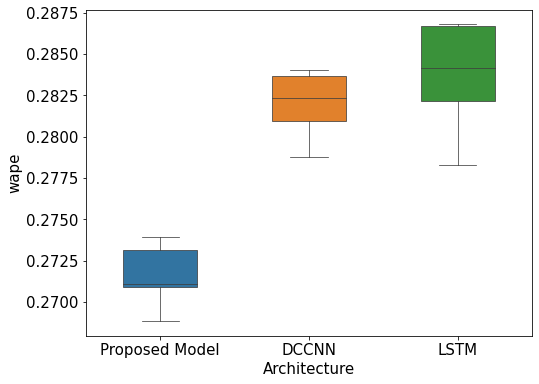

In [48]:
# Result of the top five performances in boxplot graph
fig, ax = plt.subplots(1,1,figsize=(8, 6))
sns.boxplot(data=top, x='Architecture', y='wape', linewidth=0.75, width=0.5, whis=100,  ax=ax)
plt.show()

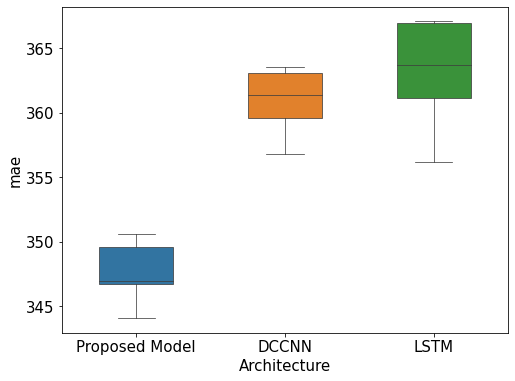

In [49]:
# Result of the top five performances in boxplot graph
fig, ax = plt.subplots(1,1,figsize=(8, 6))
sns.boxplot(data=top, x='Architecture', y='mae', linewidth=0.75, width=0.5, whis=100,  ax=ax)
plt.show()

C:\Users\kepco\anaconda3\envs\IRP\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


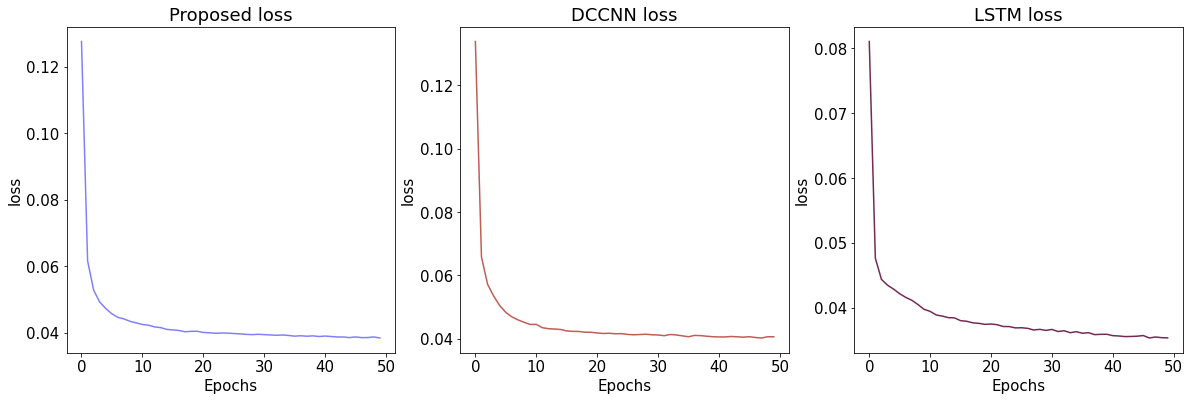

In [50]:
# training and validation losses for models in Line Graph
loss_proposed = np.fromstring(top_dccnn_lstm.head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
loss_dccnn = np.fromstring(top_dccnn.head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
loss_lstm = np.fromstring(top_lstm.head(1)['loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')

fig,ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].plot(loss_proposed, label=('loss','Proposed Model'), c=cmap['Proposed Model'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Proposed loss')
ax[1].plot(loss_dccnn, label=('loss','Proposed Model'), c=cmap['DCCNN'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('DCCNN loss')
ax[2].plot(loss_lstm, label=('loss','Proposed Model'), c=cmap['LSTM'])
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('loss')
ax[2].set_title('LSTM loss')
fig.show()

C:\Users\kepco\anaconda3\envs\IRP\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


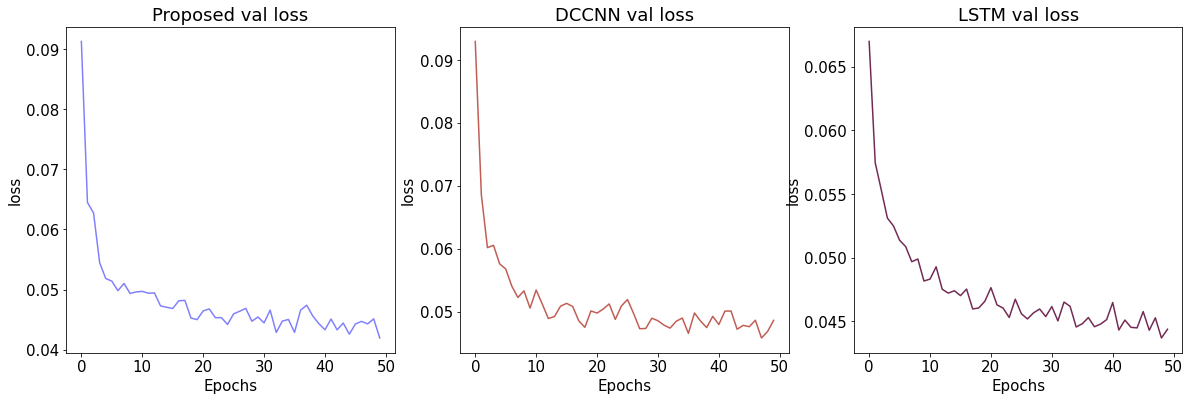

In [51]:
# training and validation losses for models in Line Graph
loss_proposed = np.fromstring(top_dccnn_lstm.head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
loss_dccnn = np.fromstring(top_dccnn.head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')
loss_lstm = np.fromstring(top_lstm.head(1)['val_loss'].iloc[0].replace('[','').replace(']',''), dtype='float32', sep=',')

fig,ax = plt.subplots(1,3,figsize=(20, 6))
ax[0].plot(loss_proposed, label=('loss','Proposed Model'), c=cmap['Proposed Model'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('loss')
ax[0].set_title('Proposed val loss')
ax[1].plot(loss_dccnn, label=('loss','Proposed Model'), c=cmap['DCCNN'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('DCCNN val loss')
ax[2].plot(loss_lstm, label=('loss','Proposed Model'), c=cmap['LSTM'])
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('loss')
ax[2].set_title('LSTM val loss')
fig.show()

In [52]:
# Best results of Proposed Model and the comparative model
top_1_wape = pd.DataFrame(columns=['Architecture', 'wape', 'mae', 'loss', 'val_loss'])
top_1_wape = top_1_wape.append(top_dccnn_lstm.reset_index().sort_values('wape')[['MODEL','Architecture', 'wape', 'mae', 'loss', 'val_loss']].head(1), ignore_index=True)
top_1_wape = top_1_wape.append(top_dccnn.reset_index().sort_values('wape')[['MODEL','Architecture', 'wape', 'mae', 'loss', 'val_loss']].head(1), ignore_index=True)
top_1_wape = top_1_wape.append(top_lstm.reset_index().sort_values('wape')[['MODEL','Architecture', 'wape', 'mae', 'loss', 'val_loss']].head(1), ignore_index=True)
top_1_wape.head()

,Architecture,wape,mae,loss,val_loss,MODEL
0,Proposed Model,0.268843,344.079650,"[0.12762226164340973, 0.061601877212524414, 0....","[0.09126058220863342, 0.06447573006153107, 0.0...",DC_CNN_LSTM_Model39
1,DCCNN,0.278762,356.774571,"[0.1339164674282074, 0.06582460552453995, 0.05...","[0.09294413030147552, 0.06859012693166733, 0.0...",DCCNN_Model_14
2,LSTM,0.278317,356.204120,"[0.0810663253068924, 0.04760945215821266, 0.04...","[0.06699555367231369, 0.057462986558675766, 0....",lstm_Model_1


In [53]:
best_model = []
model_proposed = load_model('model/DC_CNN_LSTM_Model39.h5')
model_dccnn = load_model('model/DCCNN_Model_14.h5')
model_lstm = load_model('model/lstm_Model_1.h5')
best_model.append(model_proposed)
best_model.append(model_dccnn)
best_model.append(model_lstm)

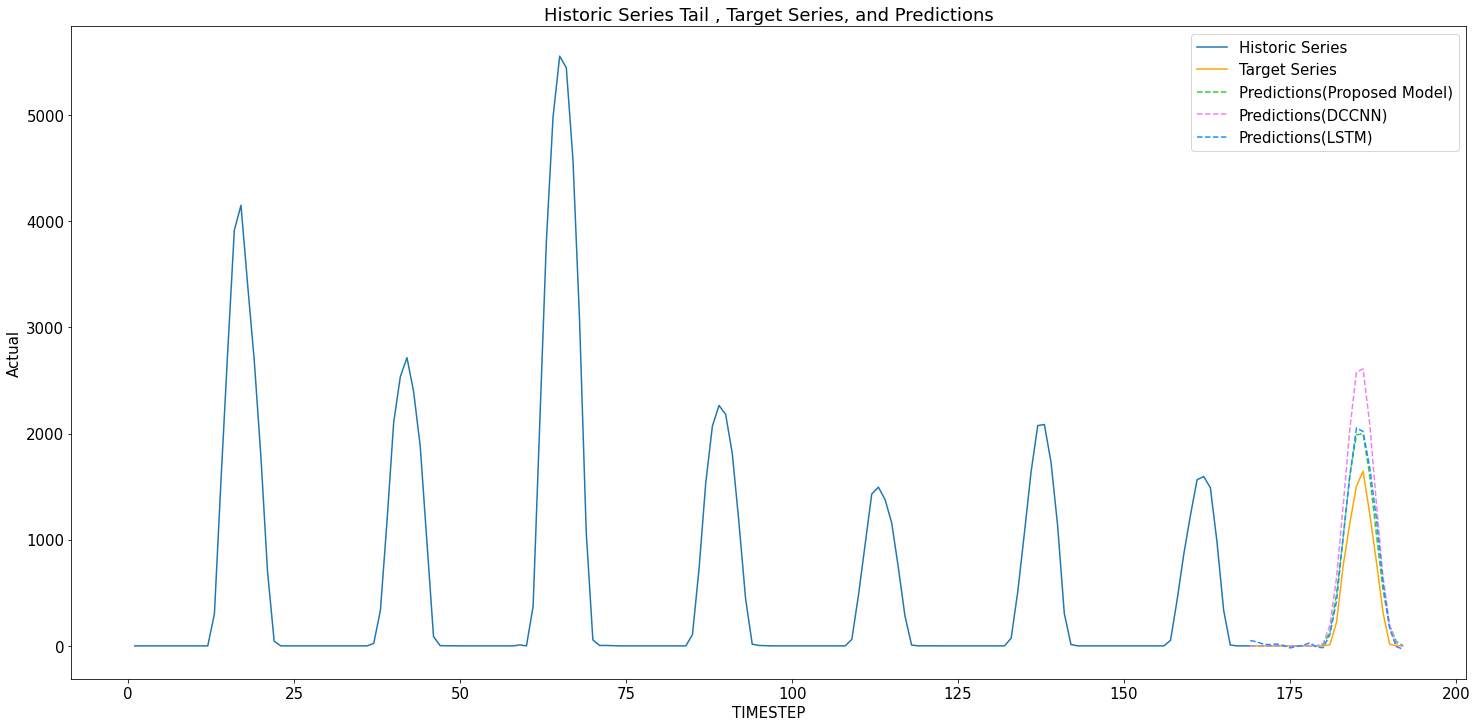

In [54]:
predict_and_plot(best_model, x_val, y_val, 5520, FUTURE_TARGET, norm_params)

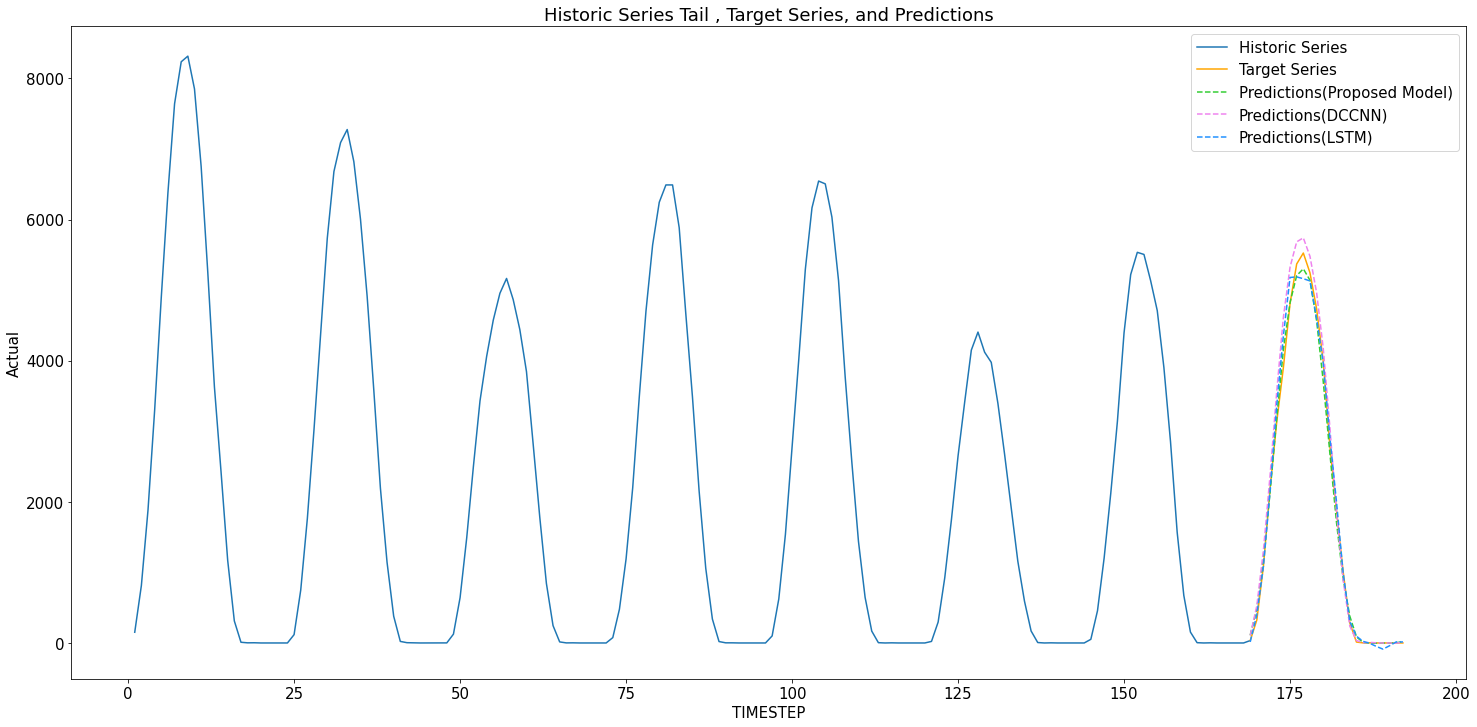

In [55]:
predict_and_plot(best_model, x_test, y_test, 4420, FUTURE_TARGET, norm_params)

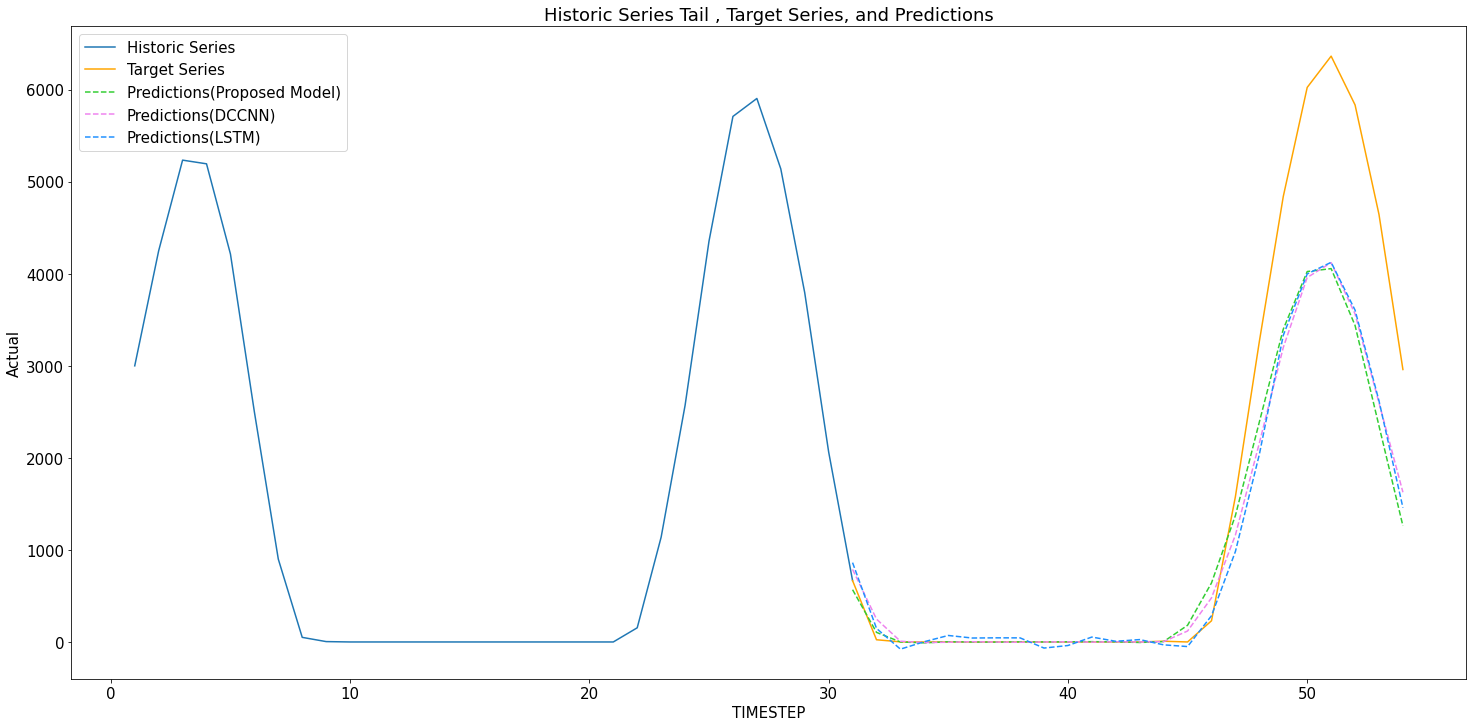

In [56]:
predict_and_plot(best_model, x_test, y_test, 1120, FUTURE_TARGET, norm_params, enc_tail_len=30)

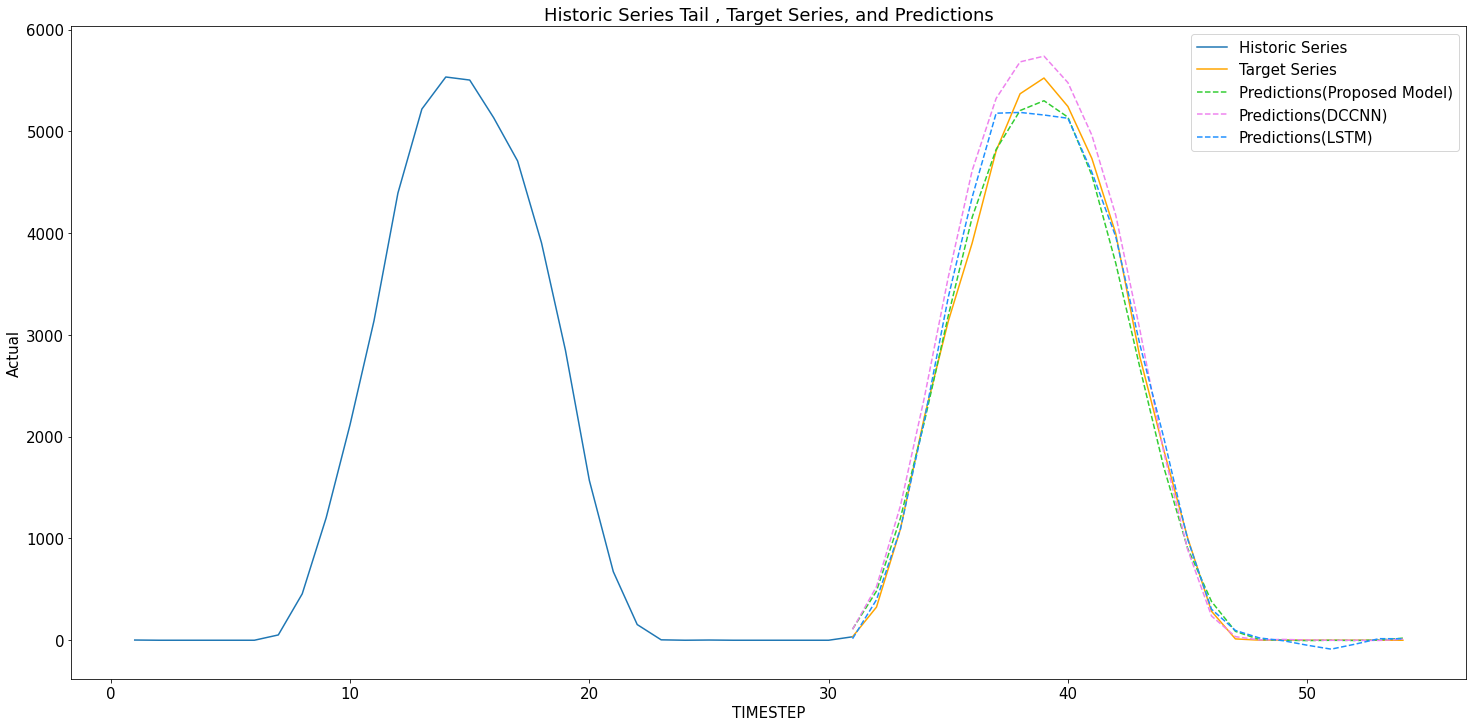

In [57]:
predict_and_plot(best_model, x_test, y_test, 4420, FUTURE_TARGET, norm_params, enc_tail_len=30)

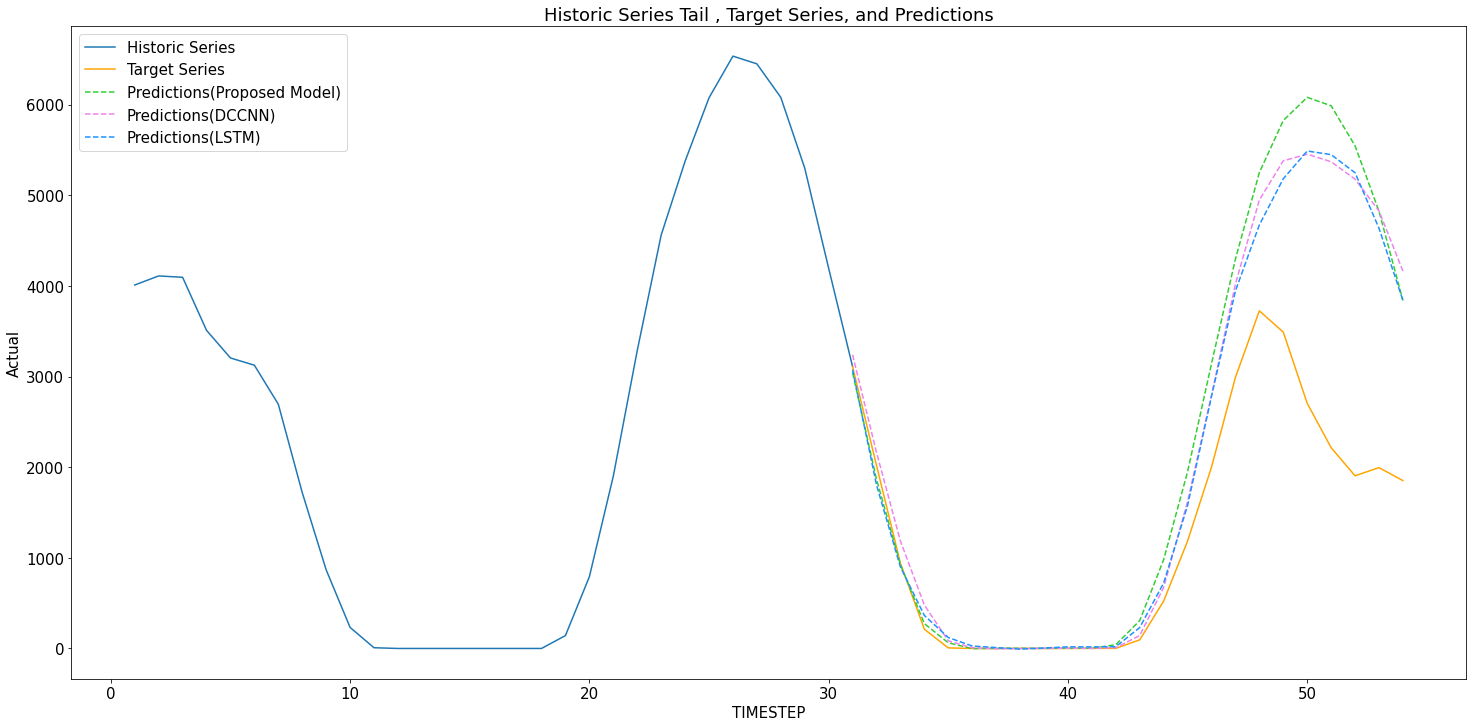

In [58]:
predict_and_plot(best_model, x_test, y_test, 3520, FUTURE_TARGET, norm_params, enc_tail_len=30)

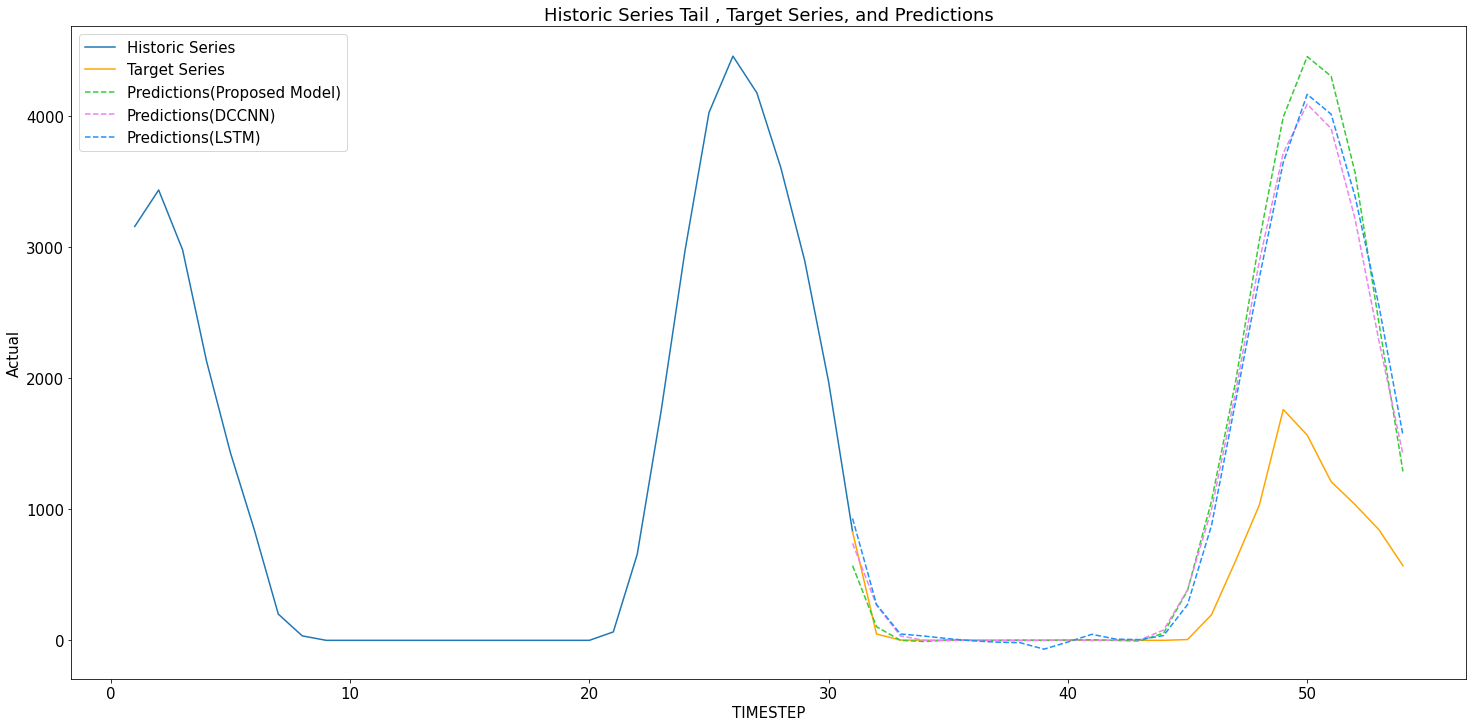

In [59]:
predict_and_plot(best_model, x_test, y_test, 6520, FUTURE_TARGET, norm_params, enc_tail_len=30)

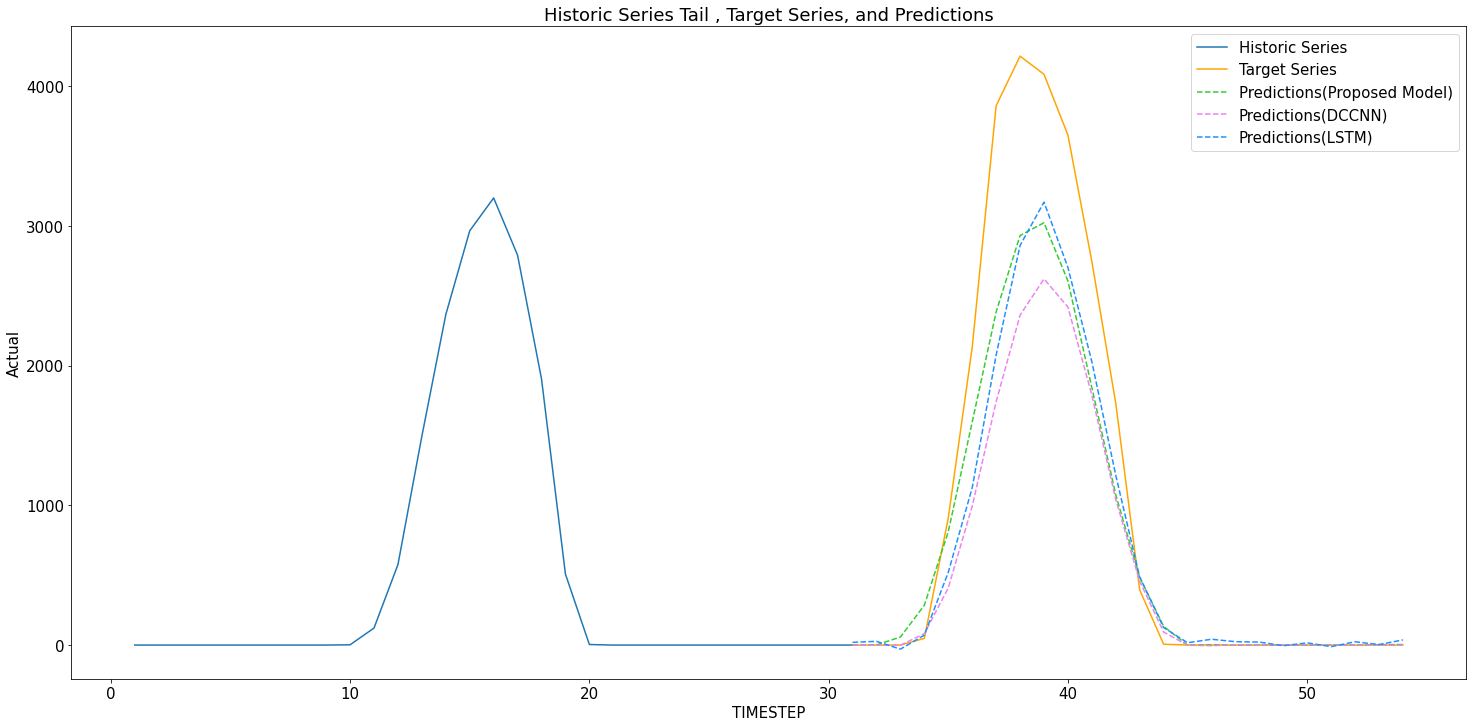

In [60]:
predict_and_plot(best_model, x_test, y_test, 820, FUTURE_TARGET, norm_params, enc_tail_len=30)